<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27752 entries, 0 to 27751
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   feature_1         27752 non-null  float64
 1   feature_2         27752 non-null  float64
 2   feature_3         27752 non-null  float64
 3   feature_4         27752 non-null  float64
 4   feature_5         27752 non-null  float64
 5   feature_6         27752 non-null  float64
 6   feature_7         27752 non-null  float64
 7   feature_8         27752 non-null  float64
 8   feature_9         27752 non-null  float64
 9   feature_10        27752 non-null  float64
 10  feature_11        27752 non-null  float64
 11  feature_12        27752 non-null  float64
 12  feature_13        27752 non-null  float64
 13  feature_14        27752 non-null  float64
 14  feature_15        27752 non-null  float64
 15  feature_16        27752 non-null  float64
 16  Class Identifier  27752 non-null  int64 

c:\Users\Hardik\envs\final\Lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[4]	train-mlogloss:1.65027	test-mlogloss:1.66016
[5]	train-mlogloss:1.60428	test-mlogloss:1.61581
[6]	train-mlogloss:1.56494	test-mlogloss:1.57783
[7]	train-mlogloss:1.52908	test-mlogloss:1.54385
[8]	train-mlogloss:1.49897	test-mlogloss:1.51535
[9]	train-mlogloss:1.46873	test-mlogloss:1.48598
[10]	train-mlogloss:1.44110	test-mlogloss:1.45924
[11]	train-mlogloss:1.41485	test-mlogloss:1.43430
[12]	train-mlogloss:1.38981	test-mlogloss:1.41044
[13]	train-mlogloss:1.36693	test-mlogloss:1.38899
[14]	train-mlogloss:1.34466	test-mlogloss:1.36828
[15]	train-mlogloss:1.32458	test-mlogloss:1.34943
[16]	train-mlogloss:1.30354	test-mlogloss:1.32943
[17]	train-mlogloss:1.28482	test-mlogloss:1.31165
[18]	train-mlogloss:1.26678	test-mlogloss:1.29511
[19]	train-mlogloss:1.24891	test-mlogloss:1.27829
[20]	train-mlogloss:1.23254	test-mlogloss:1.26303
[21]	train-mlogloss:1.21665	test-mlogloss:1.24792
[22]	train-mlogloss:1.20120	test-mlogloss:1.23309
[23]	train-mlogloss:1.18818	test-mlogloss:1.22149
[24]	t

c:\Users\Hardik\envs\final\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:05:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       515
           1       0.98      0.99      0.99       803
           2       0.95      0.95      0.95       463
           3       0.88      0.91      0.89       635
           4       0.84      0.88      0.86       735
           5       0.80      0.90      0.85       869
           6       0.92      0.81      0.86      1531

    accuracy                           0.90      5551
   macro avg       0.91      0.92      0.91      5551
weighted avg       0.90      0.90      0.90      5551

Confusion Matrix:
 [[ 509    4    0    0    0    0    2]
 [   1  795    2    0    2    0    3]
 [   0    2  439   14    2    2    4]
 [   2    0    2  580   33    6   12]
 [   0    2    0   12  646   40   35]
 [   0    0    0    9   20  783   57]
 [   6    6   18   47   62  145 1247]]


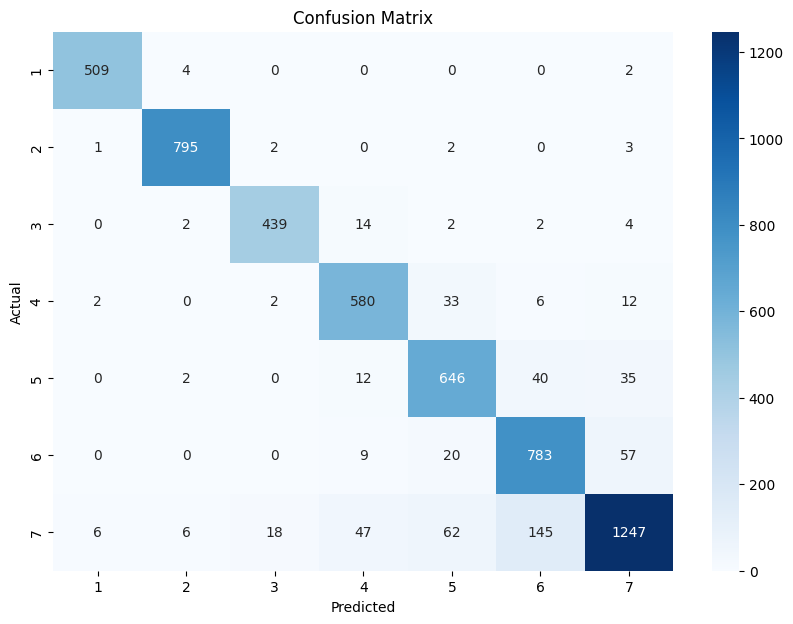

In [8]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file containing p-values
df = pd.read_csv('combined_file.csv')

df.drop('Image Name',axis=1,inplace=True)
df.info()



X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(int) - 1 



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


dtrain = xgb.DMatrix(X_train,y_train,enable_categorical=True)
dtest = xgb.DMatrix(X_test, y_test, enable_categorical=True)

params = {
    'max_depth':4,
    'eta':0.1,
    'objective':'multi:softprob',
    'num_class':7,
    'eval_metric': 'mlogloss'
}


epoch=500
eval_res={}
evals = [(dtrain, 'train'), (dtest, 'test')]
model = xgb.train(params,dtrain,epoch,evals,evals_result=eval_res)

# Make predictions using the trained model
y_pred_probs = model.predict(dtest)  # Get probabilities for each class

# Convert probabilities to class labels
y_pred = y_pred_probs.argmax(axis=1)  # Get class labels by taking argmax

# Save the model
model.save_model('xgboost_model.model')

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Now y_pred is the predicted class labels
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5, 6, 7], yticklabels=[1, 2, 3, 4, 5, 6, 7])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


